In [1]:
# computational import
import numpy as np
import xarray as xr

# plotting import
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cmocean

In [2]:
# open variance dataset 
ds = xr.open_dataset('/Users/elifaigle/Desktop/aws/hycom_variance_step_1.nc')
ds15 = xr.open_dataset('/Users/elifaigle/Desktop/aws/hycom_variance_step_1_15m.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:  (lon: 719, lat: 359)
Coordinates:
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 ... 87.99 88.5 89.0 89.5
Data variables:
    eul_var  (lon, lat) float64 ...
    lag_var  (lon, lat) float64 ...

In [4]:
# import datelist for plotting
dlist = ['31-Jan-2014','02-Mar-2014','01-Apr-2014','01-May-2014','31-May-2014','30-Jun-2014',
    '30-Jul-2014','29-Aug-2014','28-Sep-2014','28-Oct-2014','27-Nov-2014']

In [5]:
# designate bins
lon = np.linspace(-180,180, 360*2)
lat = np.linspace(-90, 90, 180*2)

/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


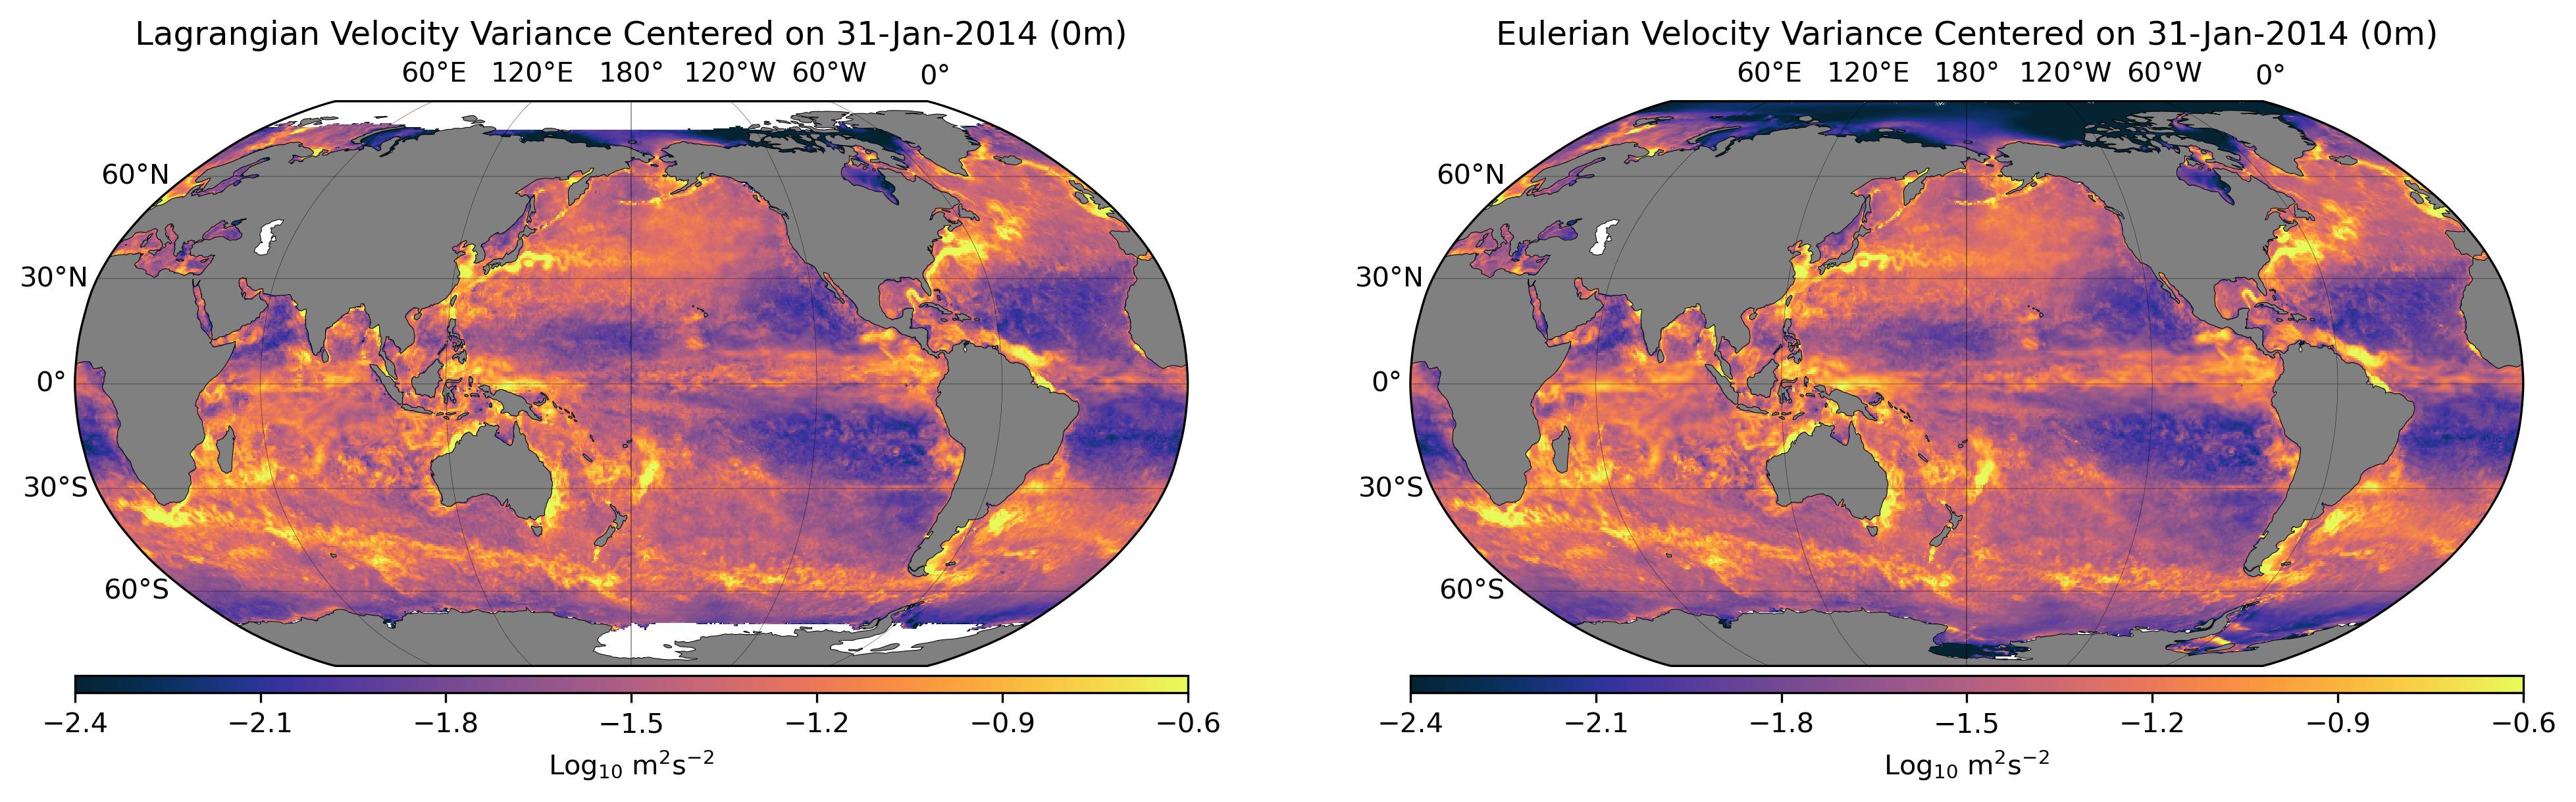

In [6]:
# create figure with ccrs.Robinson projection
fig, ax = plt.subplots(figsize = (16,10), nrows = 1, ncols=2, dpi = 300, 
                       subplot_kw ={'projection': ccrs.Robinson(central_longitude=-180)})
# import colormap
cmap = plt.colormaps.get_cmap('cmo.thermal')
# create image
image1 = ax[0].pcolormesh(lon, lat,
np.log10(ds['lag_var'].transpose()), 
cmap=cmap, 
transform=ccrs.PlateCarree(),
vmin=-2.4, vmax=-0.6) 

# gridlines and labels
gl = ax[0].gridlines(color='k', linewidth=0.1, linestyle='-',
xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# add land and coastline
ax[0].add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax[0].add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("bottom", size="3%", pad=0.05, axes_class=plt.Axes)
cb = fig.colorbar(image1, cax=cax, orientation = "horizontal", ticks = np.linspace(-2.4, -0.6, 7));
cb.set_label('Log$_{10}$ m$^{2}$s$^{-2}$')
ax[0].set_title('Lagrangian Velocity Variance Centered on '+dlist[0]+' (0m)');

#second subplot  

image2 =  ax[1].pcolormesh(lon, lat,
np.log10(ds['eul_var'].transpose()), 
cmap=cmap, 
transform=ccrs.PlateCarree(),
vmin=-2.4, vmax=-0.6) 

# gridlines and labels
gl = ax[1].gridlines(color='k', linewidth=0.1, linestyle='-',
xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# add land and coastline
ax[1].add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax[1].add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("bottom", size="3%", pad=0.05, axes_class=plt.Axes)
cb = fig.colorbar(image2, cax=cax, orientation = "horizontal", ticks = np.linspace(-2.4, -0.6, 7));
cb.set_label('Log$_{10}$ m$^{2}$s$^{-2}$')
ax[1].set_title('Eulerian Velocity Variance Centered on '+dlist[0]+' (0m)')
plt.savefig('/Users/elifaigle/Desktop/aws/lag_eul_var_0m_step_1.png', format = 'png')

/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


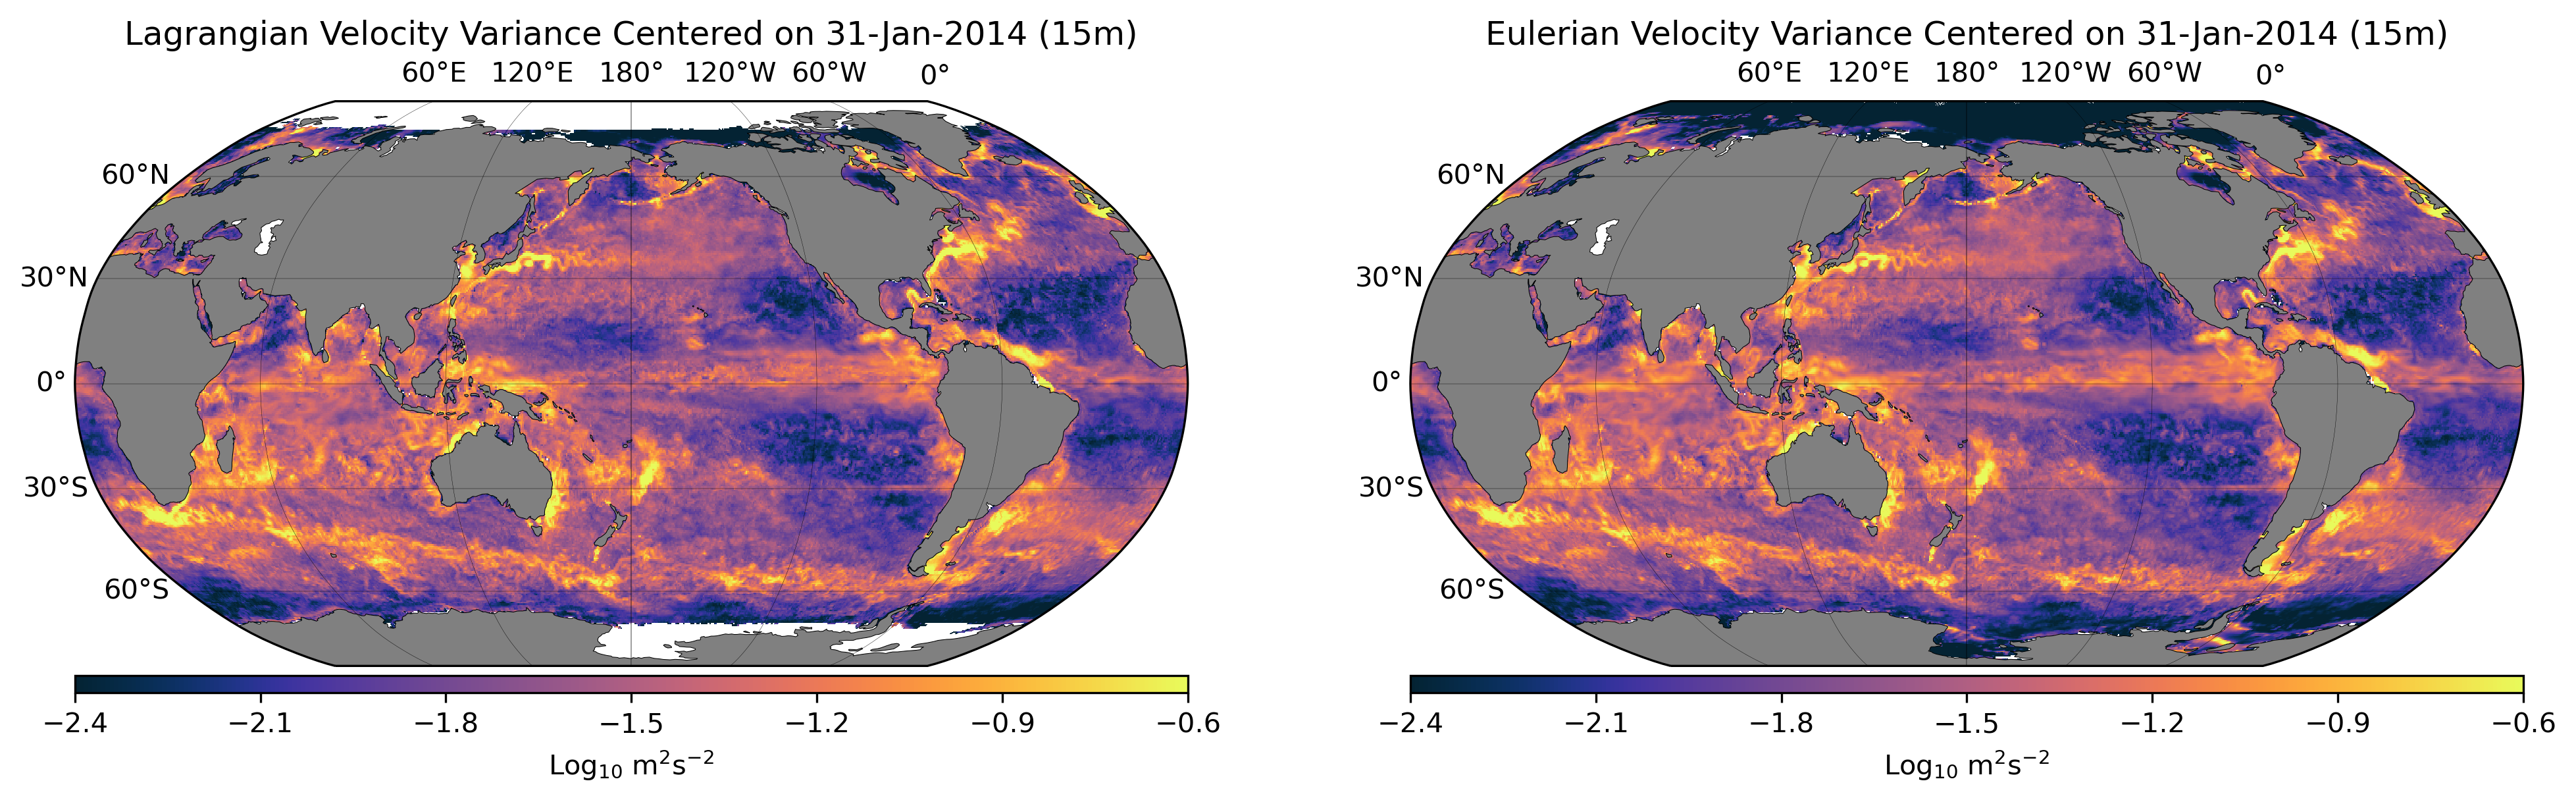

In [7]:
# create figure with ccrs.Robinson projection
fig, ax = plt.subplots(figsize = (16,10), nrows = 1, ncols=2, dpi = 300, 
                       subplot_kw ={'projection': ccrs.Robinson(central_longitude=-180)})
# import colormap
cmap = plt.colormaps.get_cmap('cmo.thermal')
# create image
image1 = ax[0].pcolormesh(lon, lat,
np.log10(ds15['lag_var'].transpose()), 
cmap=cmap, 
transform=ccrs.PlateCarree(),
vmin=-2.4, vmax=-0.6) 

# gridlines and labels
gl = ax[0].gridlines(color='k', linewidth=0.1, linestyle='-',
xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# add land and coastline
ax[0].add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax[0].add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("bottom", size="3%", pad=0.05, axes_class=plt.Axes)
cb = fig.colorbar(image1, cax=cax, orientation = "horizontal", ticks = np.linspace(-2.4, -0.6, 7));
cb.set_label('Log$_{10}$ m$^{2}$s$^{-2}$')
ax[0].set_title('Lagrangian Velocity Variance Centered on '+dlist[0]+' (15m)');

#second subplot  

image2 =  ax[1].pcolormesh(lon, lat,
np.log10(ds15['eul_var'].transpose()), 
cmap=cmap, 
transform=ccrs.PlateCarree(),
vmin=-2.4, vmax=-0.6) 

# gridlines and labels
gl = ax[1].gridlines(color='k', linewidth=0.1, linestyle='-',
xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# add land and coastline
ax[1].add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax[1].add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("bottom", size="3%", pad=0.05, axes_class=plt.Axes)
cb = fig.colorbar(image2, cax=cax, orientation = "horizontal", ticks = np.linspace(-2.4, -0.6, 7));
cb.set_label('Log$_{10}$ m$^{2}$s$^{-2}$')
ax[1].set_title('Eulerian Velocity Variance Centered on '+dlist[0]+' (15m)')
plt.savefig('/Users/elifaigle/Desktop/aws/lag_eul_var_15m_step_1.png', format = 'png')

In [8]:
# create ratio statistics
ratio = (ds['lag_var'] - ds['eul_var']) / (ds['lag_var'] + ds['eul_var'])
ratio15 = (ds15['lag_var'] - ds15['eul_var']) / (ds15['lag_var'] + ds15['eul_var'])

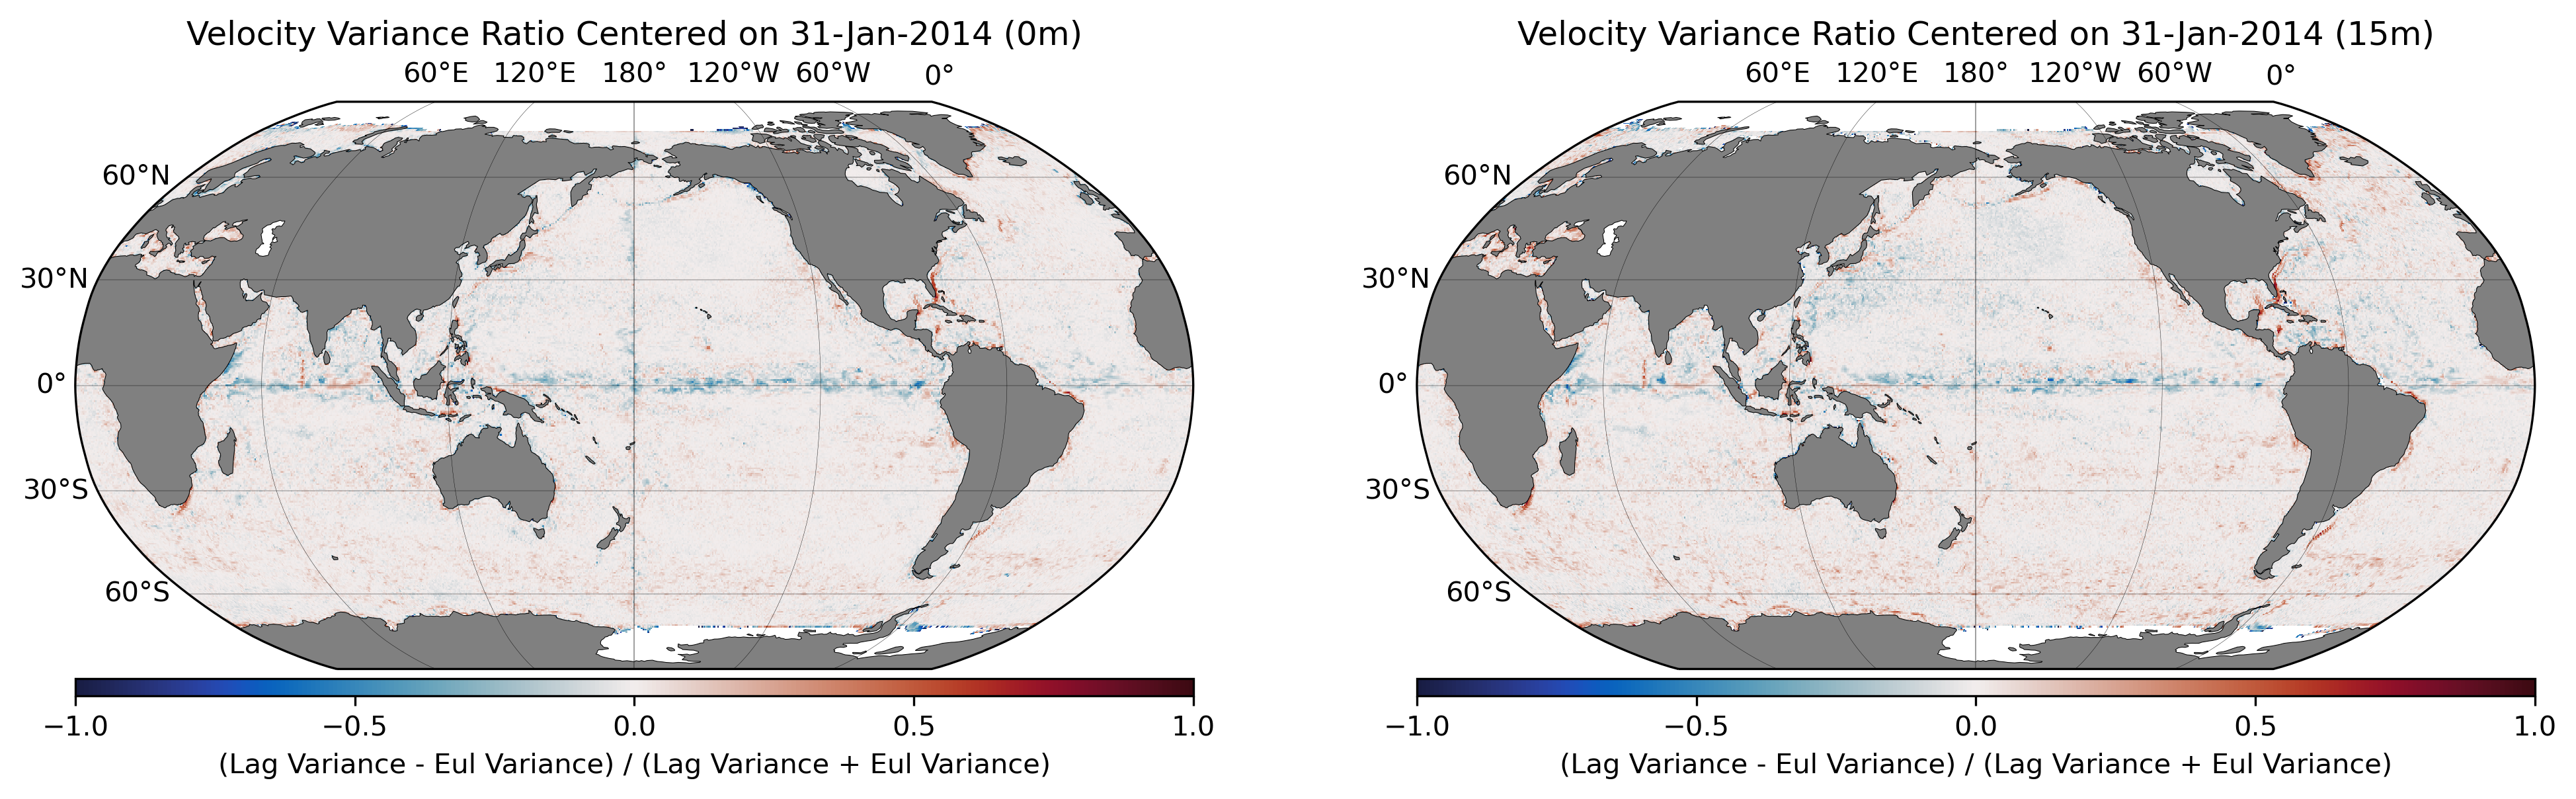

In [10]:
# create figure with ccrs.Robinson projection
fig, ax = plt.subplots(figsize = (16,10), nrows = 1, ncols=2, dpi = 300, 
                       subplot_kw ={'projection': ccrs.Robinson(central_longitude=-180)})
# import colormap
cmap = plt.colormaps.get_cmap('cmo.balance')
# create image
image1 = ax[0].pcolormesh(lon, lat,
(ratio.transpose()), 
cmap=cmap, 
transform=ccrs.PlateCarree(),
vmin=-1.0, vmax=1.0) 

# gridlines and labels
gl = ax[0].gridlines(color='k', linewidth=0.1, linestyle='-',
xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# add land and coastline
ax[0].add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax[0].add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("bottom", size="3%", pad=0.05, axes_class=plt.Axes)
cb = fig.colorbar(image1, cax=cax, orientation = "horizontal", ticks = np.linspace(-1.0, 1.0, 5));
ax[0].set_title('Velocity Variance Ratio Centered on '+dlist[0]+' (0m)');
cb.set_label('(Lag Variance - Eul Variance) / (Lag Variance + Eul Variance)')


#second subplot  

image2 =  ax[1].pcolormesh(lon, lat,
ratio15.transpose(), 
cmap=cmap, 
transform=ccrs.PlateCarree(),
vmin=-1.0, vmax=1.0) 

# gridlines and labels
gl = ax[1].gridlines(color='k', linewidth=0.1, linestyle='-',
xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# add land and coastline
ax[1].add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax[1].add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("bottom", size="3%", pad=0.05, axes_class=plt.Axes)
cb = fig.colorbar(image2, cax=cax, orientation = "horizontal", ticks = np.linspace(-1.0, 1.0, 5));
cb.set_label('(Lag Variance - Eul Variance) / (Lag Variance + Eul Variance)')
ax[1].set_title('Velocity Variance Ratio Centered on '+dlist[0]+' (15m)');
plt.savefig('/Users/elifaigle/Desktop/aws/lag_eul_var_ratio_step_1.png', format = 'png')